In [20]:
import re
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [22]:
df.shape

(10337, 2)

In [23]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [24]:
X = data["Text"]
y = data["Language"]

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
text_list = []

for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        text_list.append(text)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(text_list).toarray()
X.shape # (10337, 39419)


(10337, 34937)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [31]:
y_prediction = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_prediction)
confusion_m = confusion_matrix(y_test, y_prediction)

print("The accuracy is :",accuracy)

The accuracy is : 0.9753384912959381


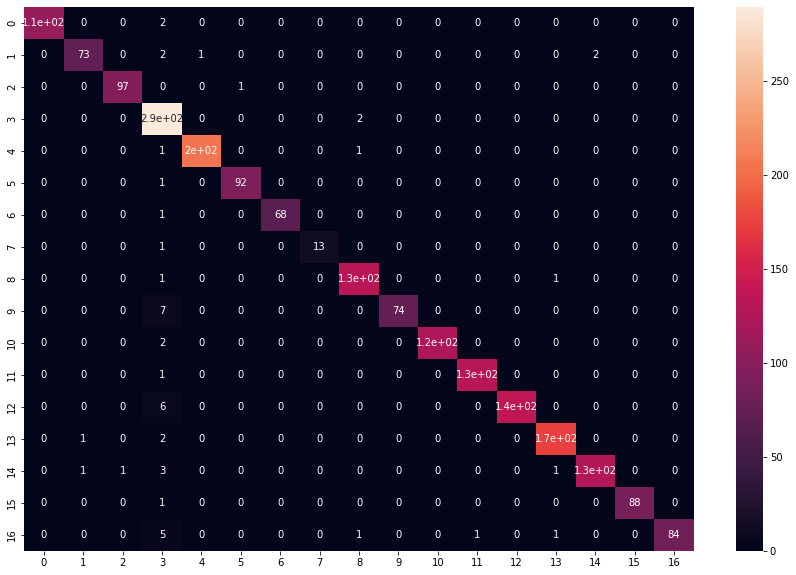

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m, annot = True)
plt.show()

In [40]:
def lang_predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x)
     lang = le.inverse_transform(lang) 
     print("The langauge is in",lang[0]) 

In [44]:
lang_predict("Today is going to be very busy because I have a lot of things to do.")

The langauge is in English


In [41]:
lang_predict("سيكون اليوم مشغولاً للغاية لأن لدي الكثير من الأشياء لأفعلها.")

The langauge is in Arabic


In [42]:
lang_predict("आज का दिन बहुत व्यस्त रहने वाला है क्योंकि मेरे पास करने के लिए बहुत कुछ है।")

The langauge is in Hindi


In [45]:
lang_predict("Сегодня будет очень занят, потому что у меня много дел.")

The langauge is in Russian


In [46]:
lang_predict("Hoy va a estar muy ocupado porque tengo muchas cosas que hacer.")

The langauge is in Spanish


In [48]:
lang_predict("Aujourd'hui va être très chargé car j'ai beaucoup de choses à faire.")

The langauge is in French


In [49]:
lang_predict("Heute wird es sehr anstrengend, weil ich viel zu tun habe.")

The langauge is in German


In [ ]:
lang_predict("")